# Data processing for solid phase sulfur from the SR2113 cores

In [1]:
# For numerical calculations
import numpy as np
import pandas as pd
import scipy as sp
import math
import matplotlib.animation as animation
from scipy.integrate import odeint
from numpy import arange
from pylab import *
from scipy.integrate import odeint
import scipy.optimize 
from scipy.optimize import leastsq
from math import exp
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
from scipy.signal import savgol_filter
import git

# Import plotting features
import matplotlib.pyplot as plt
import seaborn as sns

# Find home directory for repo
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir

# Set plot style
sns.set_style("ticks")
sns.set_palette("colorblind", color_codes=True)
sns.set_context("talk")

# Magic command to plot inline
%matplotlib inline

#To graph in SVG (high def)
%config InlineBackend.figure_format="svg"

### Elemental sulfur profile



In [2]:
# Import table with data
df_elemental_sulfur =  pd.read_csv (f'{homedir}/data/raw/quantifications/elemental_sulfur.csv')
df_elemental_sulfur.head()

,Date,Core,Real_depth_cm,Weigh of dry sediment (g),MetOH Weigh (g),Conc (uM),ugS_per_l,ug_S_in_vol,ugS_per_gram_of_sed
0,February_2023,CR_02,21.5,0.4961,944.5000,1.435243,46.021077,0.045748,0.092215
1,March_2023,CR_02,33.5,0.8360,1.0433,4.479969,143.650202,0.189469,0.226638
2,March_2023,CR_02,39.5,0.7035,0.9905,6.194019,198.611218,0.248703,0.183523
3,March_2023,CR_02,57.5,0.9827,0.8069,6.281879,201.428442,0.205477,0.209095
4,March_2023,CR_02,66.5,0.9562,0.8460,11.088455,355.551322,0.380274,0.397693


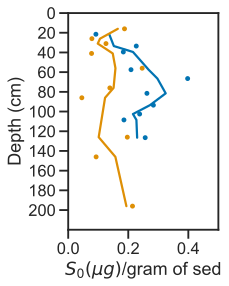

In [4]:
#Plot the elemental sulfur profiles
# Group data by core
grouped = df_elemental_sulfur.groupby('Core')
#Make plot
fig, ax = plt.subplots(figsize=(2.7,4))
for i, (group,data) in enumerate(grouped):
    # Get Unique core labels
    color_labels = sort(df_elemental_sulfur['Core'].unique())
    # Define colors
    colors = sns.color_palette("colorblind", len(color_labels))
    # Create dictionary that pairs core labels with colors
    color_map = dict(zip(color_labels, colors))
    # Map core labels to the colors
    color = data['Core'].map(color_map)
    
    #Make errorbar plot
    ax.scatter(data['ugS_per_gram_of_sed'], data['Real_depth_cm'], s=12)
    
    #Create a Savitzky-Golay filter. It uses least squares to regress a small window of your data onto a polynomial, 
    #then uses the polynomial to estimate the point in the center of the window. Finally the window is shifted forward 
    #by one data point and the process repeats. This continues until every point has been optimally adjusted relative 
    #to its neighbors. It works great even with noisy samples from non-periodic and non-linear sources.
    xhat = savgol_filter(data['ugS_per_gram_of_sed'], 9, 5, mode='nearest') # window size 51, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    ax.plot(xhat, data['Real_depth_cm'], color=colors[i])
    
    # Set plot title
    #ax.set_title('Oxygen', fontsize =16)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('$S_0 (\mu g)$/gram of sed')
    ax.set_ylabel('Depth (cm)')
    ax.set_yticks(np.arange(0, 220, 20.0))
    ax.set_ylim(220, 0)
    ax.set_xlim(0, 0.5)
    #ax.set_xticks(np.linspace(20, 24, 5).round(0))
    
#Save figure
fig.savefig(f'{homedir}/figures/elemental_s.pdf', bbox_inches='tight')